Import knihoven


In [207]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt
import math


Import souboru se jmeny 

In [208]:
#loads coco.names into list classNames 
classesfile='coco.names'
classNames=[]
with open(classesfile,'rt') as f:
    classNames=f.read().rstrip('\n').split('\n')

Model

In [209]:
model = YOLO('yolov8n.pt')#loads the model 

Pokud chci hledat urcity objekt zjisti jeho id

In [210]:
searched_object = 'pottedplant' #name of object I want to find
object_id = classNames.index(searched_object)# gets id of the object I want to find  
print(object_id)

58


nacte a zobrazy zvoleny obrazek

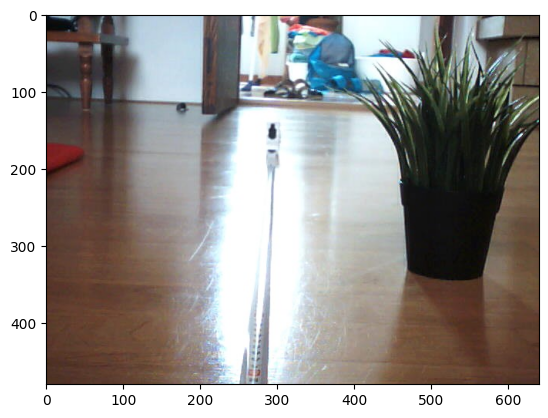

In [211]:
img = cv2.imread('60test.jpg')#loads the picture into variable 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))#show the picture in rgb because cv2 use BGR color model  

zjisti velikost obrazku 

In [212]:
img_height,img_width,img_channels = img.shape# gets some info 
print('width',img_width,'Px')#width
print('height',img_height,'Px')#height 
print('channels',img_channels)#colour channels 

width 640 Px
height 480 Px
channels 3


pouziti modelu na nalezeni objektu

In [213]:
results = model(img)#applies model on the image 



0: 480x640 1 potted plant, 2 vases, 111.0ms
Speed: 2.0ms preprocess, 111.0ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


vykresleni jednotlivych objektu na obrazek

In [214]:
objects_ids = []#list for ids of found objects 
objects_centers = []#list for objects centers 
objects_heights = []# list for objects height, used for calculating distance of the objects
distances = [] 
for r in results:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])#gets the object id 
            print(classNames[cls])#prints the object class 
            print(cls) #prints the object id 
            #bounding boxes
            x1,y1,x2,y2 = box.xyxy [0] #x1 je pozice leveho horniho rohu objektu v ose x, x2 je velikost objektu v ose x v px 
            x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)#prevedeni hodnot na int pro lepsi praci s nima 
            print('X=',x1,'Y=',y1,'W=',x2,'H=',y2)#vypisuje velikost objektu a jeho polohu v px 
            if cls == 58:
                cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,255),3)#nakresli box okolo detekovane veci 
            #object center 
            center_x,center_y = x1+(x2/2),y1+(y2/2)#vypocet stredu objektu pro lepsi lokalizaci medveda 
            center_x,center_y = int(center_x-x1/2), int(center_y-y1/2)#prevede hodnoty na int aby se dali pouzit ve funkci ukazujici stred 
            center = center_x,center_y
            print('center:',center_x,center_y)#vypise udaje 
            if cls == 58:
                cv2.circle(img, (center_x,center_y),10, (255,0,255), thickness=-1)
            #model confidence
            conf = box.conf[0]#jistota modelu 
            conf = float(conf*100)
            rounded_conf = int(conf)#zaokrouhli jistotu modelu na dve desetina mista 
            print('confidence:',rounded_conf)
            #box on bounding box s nazvem claasy a confidence modelu
            if cls == 58:
                cvzone.putTextRect(img, f'{classNames[cls]}{rounded_conf}',(max(0,x1), max(35,y1)))#vykresli nazev classy objektu spolecne s confidence do videa 
            objects_ids.append(cls)#zapisovani hodnot do listu
            objects_centers.append(center)#zapisovani hodnot do listu
            objects_heights.append(y2)
            distance = img_height-y1-y2
            print(distance)
            distances.append(distance)
cv2.line(img,(int(img_width/2),0),(int(img_width/2),img_height),(255,0,0),thickness=2 )#vykresli na video primku stredem videa

pottedplant
58
X= 340 Y= 0 W= 639 H= 352
center: 489 176
confidence: 46
128
vase
75
X= 441 Y= 13 W= 640 H= 346
center: 540 179
confidence: 31
121
vase
75
X= 343 Y= 4 W= 639 H= 347
center: 491 175
confidence: 27
129


array([[[ 93,  85,  78],
        [ 73,  64,  55],
        [ 59,  48,  40],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[ 84,  76,  69],
        [ 64,  55,  46],
        [ 51,  41,  31],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[ 72,  63,  54],
        [ 53,  44,  34],
        [ 40,  30,  20],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       ...,

       [[ 38,  52,  75],
        [ 38,  52,  75],
        [ 39,  52,  78],
        ...,
        [ 37,  49,  77],
        [ 38,  49,  77],
        [ 37,  49,  77]],

       [[ 39,  51,  75],
        [ 40,  52,  76],
        [ 40,  51,  78],
        ...,
        [ 35,  49,  77],
        [ 37,  49,  77],
        [ 35,  49,  77]],

       [[ 42,  52,  76],
        [ 42,  52,  76],
        [ 42,  51,  78],
        ...,
        [ 36,  50,  78],
        [ 36,  50,  78],
        [ 36,  50,  78]]

vypise id nalezenych objektu 

In [215]:
print(objects_ids)
print(objects_centers)
print(objects_heights)

[58, 75, 75]
[(489, 176), (540, 179), (491, 175)]
[352, 346, 347]


hledani urciteho objektu

In [216]:
a = objects_ids.index(58)#in list object_ids search for specific number and returns index of the number
print(a)#prints the index 
x,y=objects_centers[a]#in list finds values for given index
print(x,y)#prints the values 
center_line = int(img_width/2)# x coordinates of image center
object_deviation = center_line-x # deviation of object from center of the screen 
print('deviation = ',object_deviation) 
h = objects_heights[a] # for given index finds object height 
print(h)
#measuring distances 
d=distances[a] # for given index finds distance of the object in px 
cv2.line(img,(0,(img_height-d)),(img_width,(img_height-d)),(0,255,0),thickness=2) #draws a line where is the object 
print(d) # prints object distance in px
#calculator from px to cm 
#if distance in px is larger than 240 px use this equation
if d>240:
    distance_cm = 0.001894930772332081 * (d- 62.49315340028377 )**2+ 41.845975945942605
#if distance in px is smaller than 240 px use this equation
if d<240:
    distance_cm = np.exp( 3.486047002894599 )*np.exp(0.0045*d)
print('distance:',distance_cm,'cm')# prints the value in cm
#angle calculating 
angle = math.atan(object_deviation/d)
print(np.rad2deg(angle),'°')
#way lenght 
w = distance_cm/(math.cos(abs(angle)))
print('distance to target:',w,'cm')





0
489 176
deviation =  -169
352
128
distance: 58.093106207054355 cm
-52.85984124766184 °
distance to target: 96.2177775560652 cm


ukaze obrazek

tensor([[3.4002e+02, 2.1326e-01, 6.3956e+02, 3.5260e+02, 4.6592e-01, 5.8000e+01],
        [4.4162e+02, 1.3192e+01, 6.4000e+02, 3.4691e+02, 3.1682e-01, 7.5000e+01],
        [3.4355e+02, 4.1223e+00, 6.3983e+02, 3.4721e+02, 2.7360e-01, 7.5000e+01]])


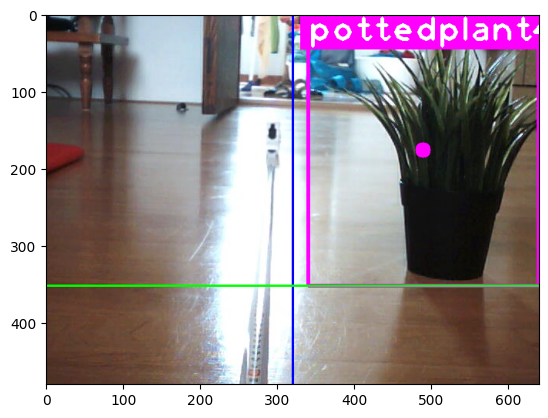

In [217]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))# konvertuje bgr to rgb
print(boxes.data)
